Heart Attack Risk Prediction Using Random Forest Classifier

Importing Libraries and Packages

In [58]:
import numpy as np #convert numpy into array
import pandas as pd #using for data manipulation
import seaborn as sb #used for statistical data visualization
import sklearn.metrics as sm #used for quantifying the quality of prediction
import matplotlib.pyplot as plt #matplotlib use for plotting
%matplotlib inline
#label encoder use for encode target labels with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder
#using skicit-learn to split data into training and testing datasets
from sklearn.model_selection import train_test_split
#import the model we are using
from sklearn.ensemble import RandomForestClassifier


Reading DataSet

In [59]:
heart_dataset=pd.read_csv('/heart.csv')

In [60]:
#display dataset
heart_dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [61]:
#display first 5 rows
heart_dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
#shape of the dataset
heart_dataset.shape

(303, 14)

In [63]:
#columns in dataset
heart_dataset.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [64]:
#descriptive statistics of each columns
heart_dataset.describe

<bound method NDFrame.describe of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  

Data PreProcessing

In [65]:
#check for all null values
sum(heart_dataset.isnull().sum())

0

In [66]:
# Check 0 values in age, trtbps, chol, thalachh columns
print((heart_dataset[['age','trtbps','chol','thalachh']]==0).sum())

age         0
trtbps      0
chol        0
thalachh    0
dtype: int64


In [67]:
#check the duplicated values
heart_dataset.duplicated().sum()

1

In [68]:
#display all negative values
heart_dataset[heart_dataset.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [69]:
heart_dataset.drop_duplicates(inplace=True)

In [70]:
#shape of the data after preprocessing
heart_dataset.shape

(302, 14)

Correlation

<Axes: >

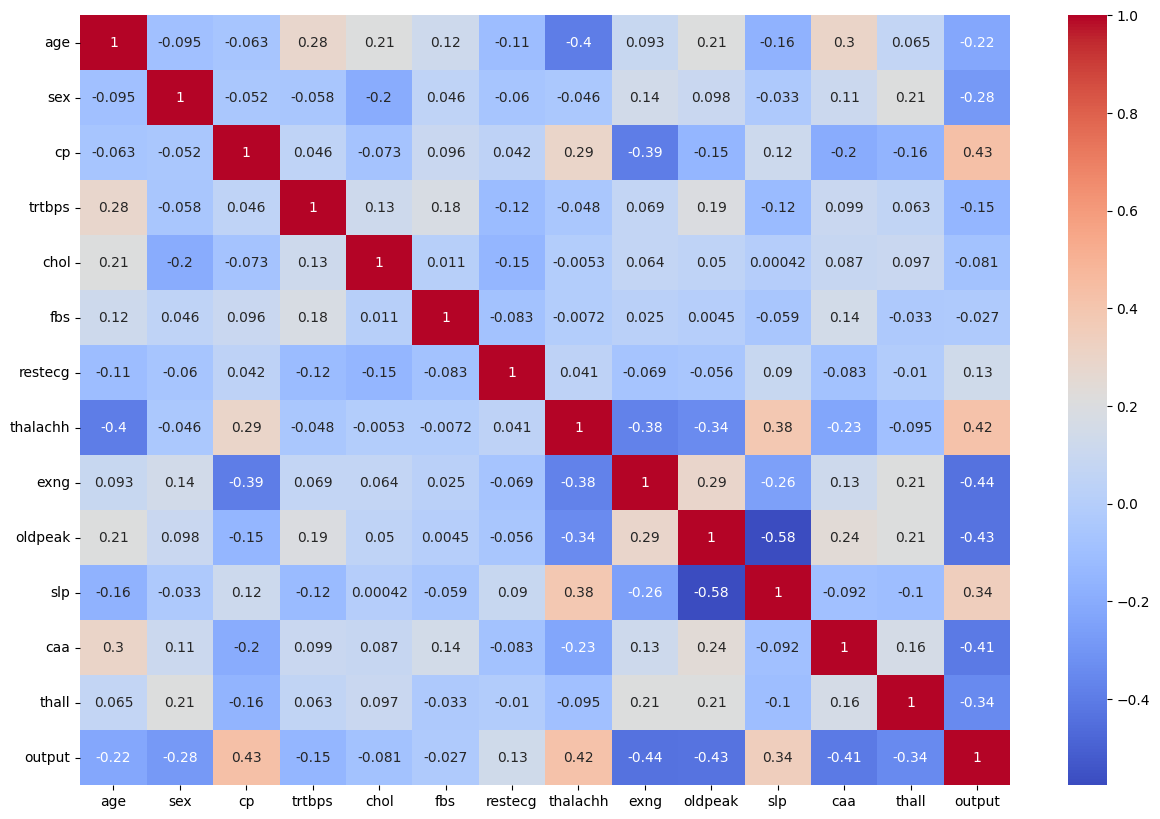

In [71]:
#Display correlation coefficient between variables
plt.figure(figsize=(15,10))
sb.heatmap(heart_dataset.corr(),annot=True,cmap='coolwarm')

Checking the distribution of Data

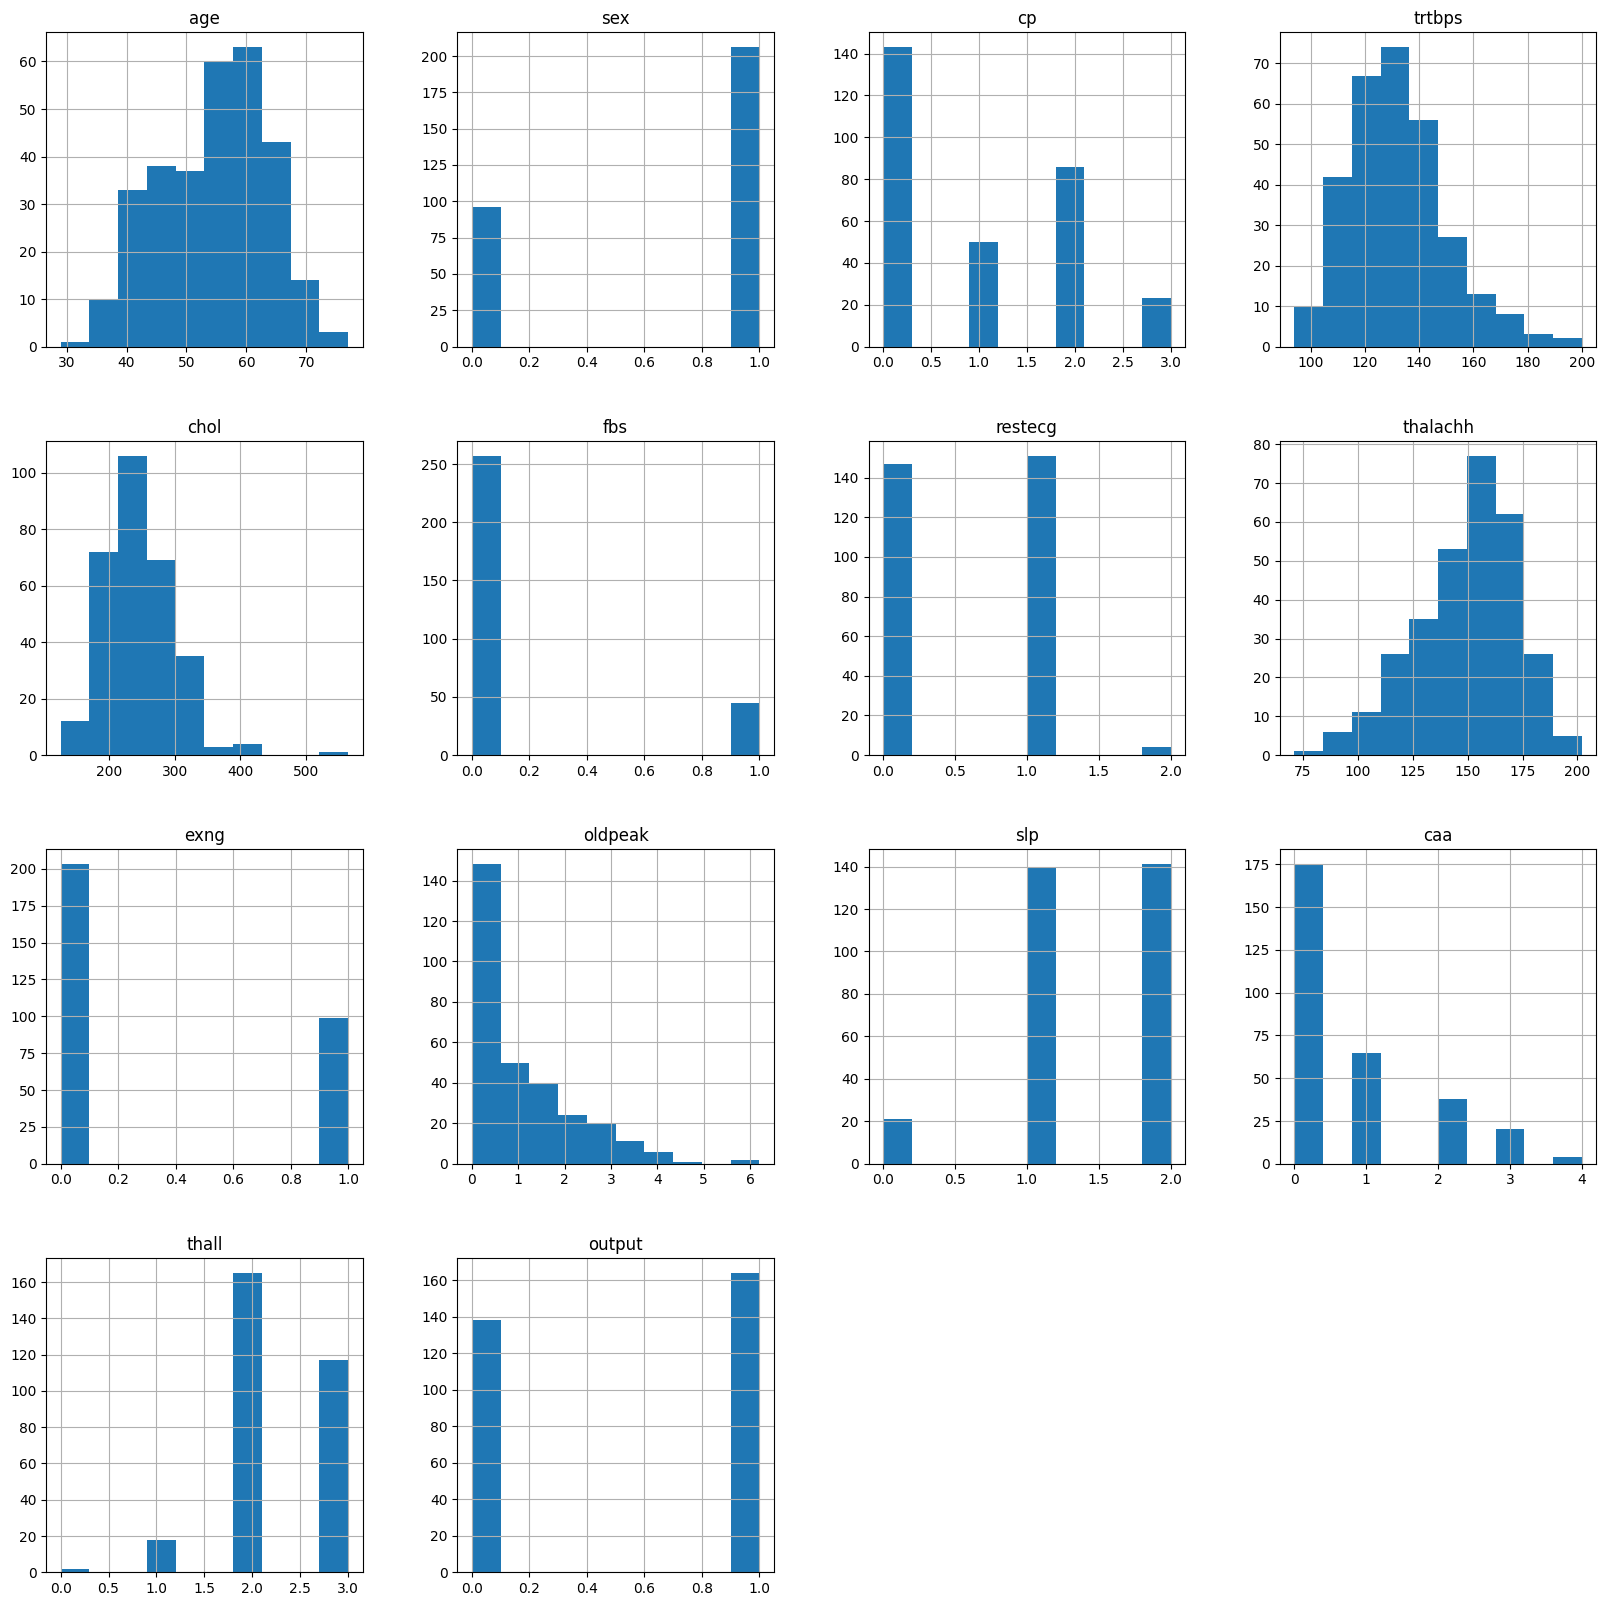

In [72]:
#display the distribution of Data
heart_dataset.hist(figsize=(20,20))
plt.show()

Text(0.5, 1.0, 'Prevalence of Heart attack by cp')

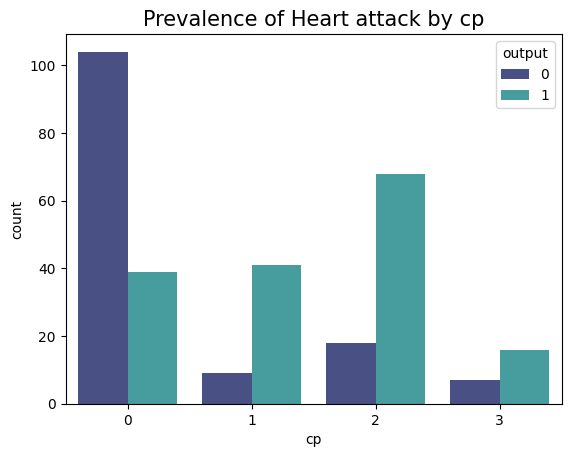

In [73]:
# Plot prevalence of heart attack by cp
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['cp'], palette="mako")
plt.title('Prevalence of Heart attack by cp',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by age')

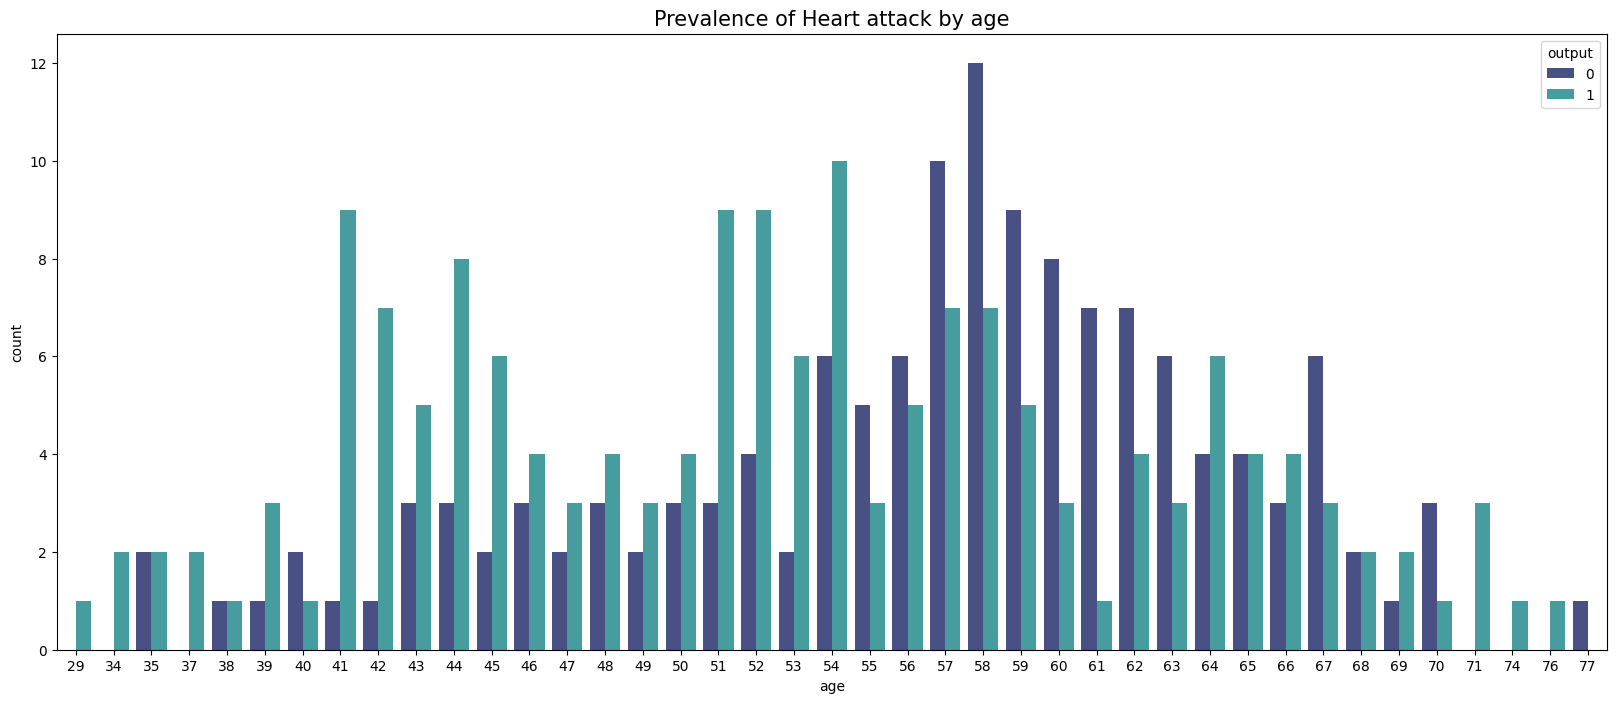

In [74]:
# Plot prevalence of heart attack by age
plt.figure(figsize = (20, 8))
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['age'], palette="mako")
plt.title('Prevalence of Heart attack by age',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart Attack by Sex')

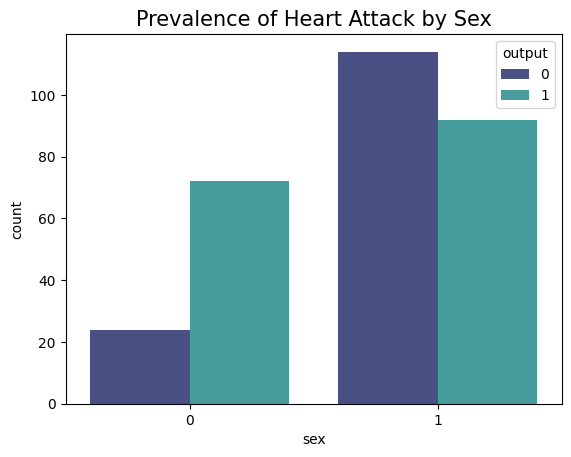

In [75]:
#plot prevalence of heart attack by sex
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['sex'],palette="mako")
plt.title('Prevalence of Heart Attack by Sex',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by trtbps')

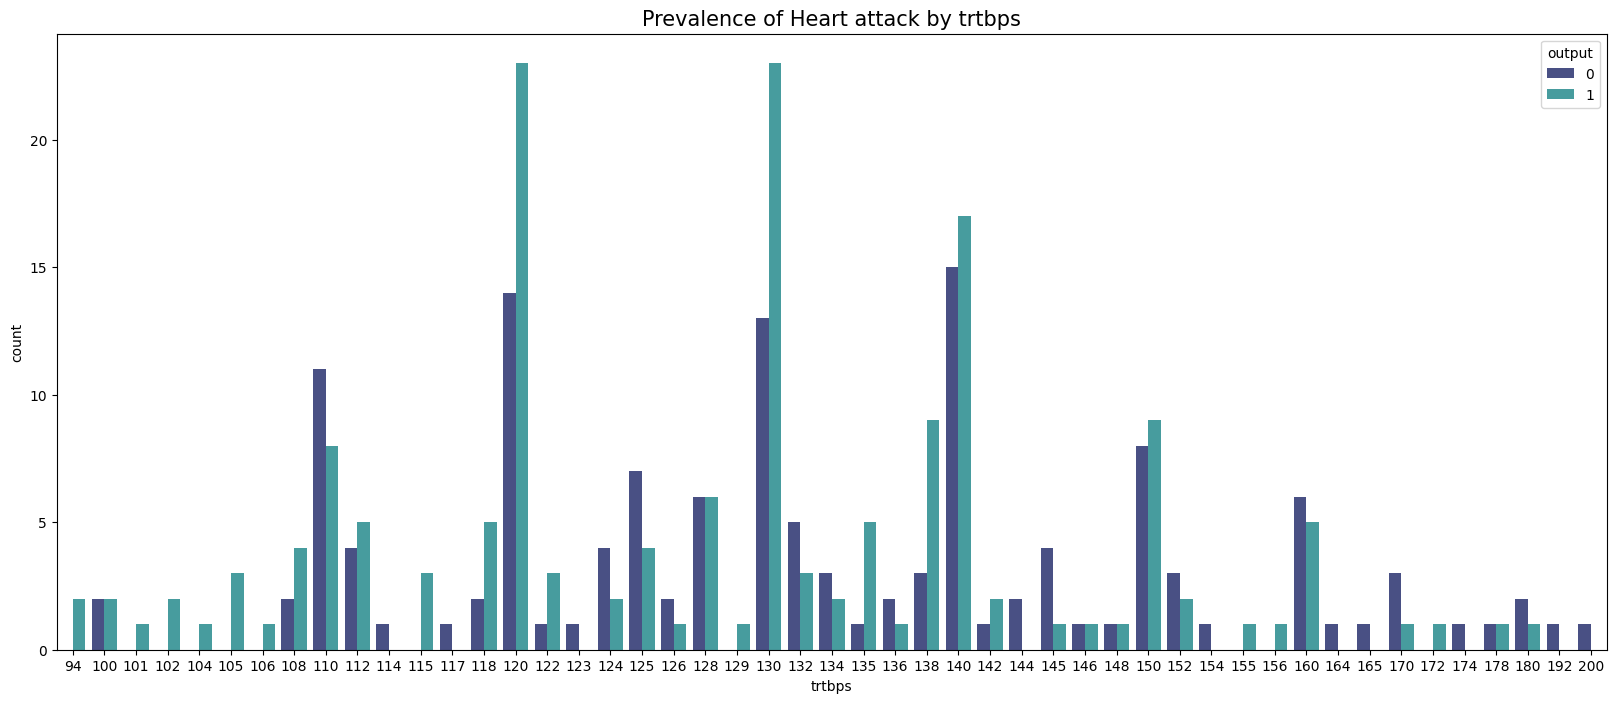

In [76]:
# Plot prevalence of heart attack by trtbps
plt.figure(figsize = (20, 8))
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['trtbps'], palette="mako")
plt.title('Prevalence of Heart attack by trtbps',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by fasting blood sugar > 120 mg/dl')

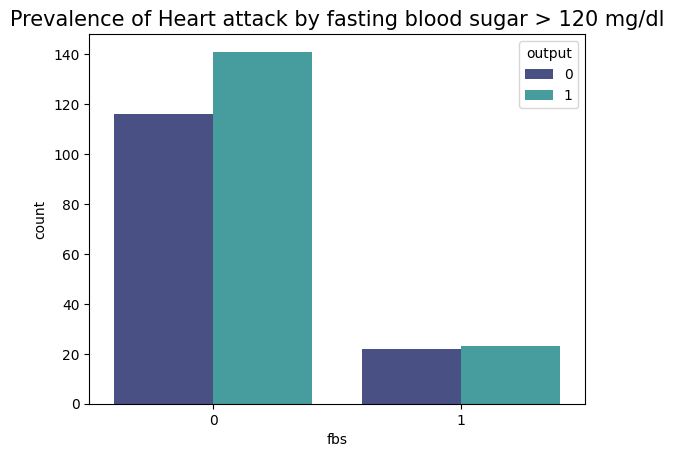

In [77]:
# Plot prevalence of heart attack by fasting blood sugar > 120 mg/dl
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['fbs'], palette="mako")
plt.title('Prevalence of Heart attack by fasting blood sugar > 120 mg/dl',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by restecg')

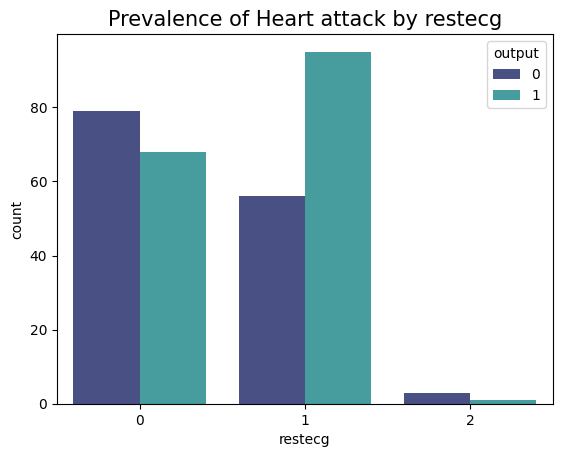

In [78]:
# Plot prevalence of heart attack by restecg
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['restecg'], palette="mako")
plt.title('Prevalence of Heart attack by restecg',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by Exercise induced angina')

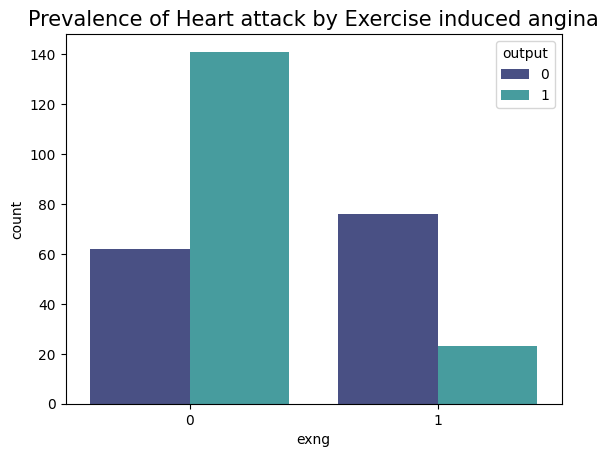

In [79]:
# Plot prevalence of heart attack by exercise induced angina
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['exng'], palette="mako")
plt.title('Prevalence of Heart attack by Exercise induced angina',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by oldpeak')

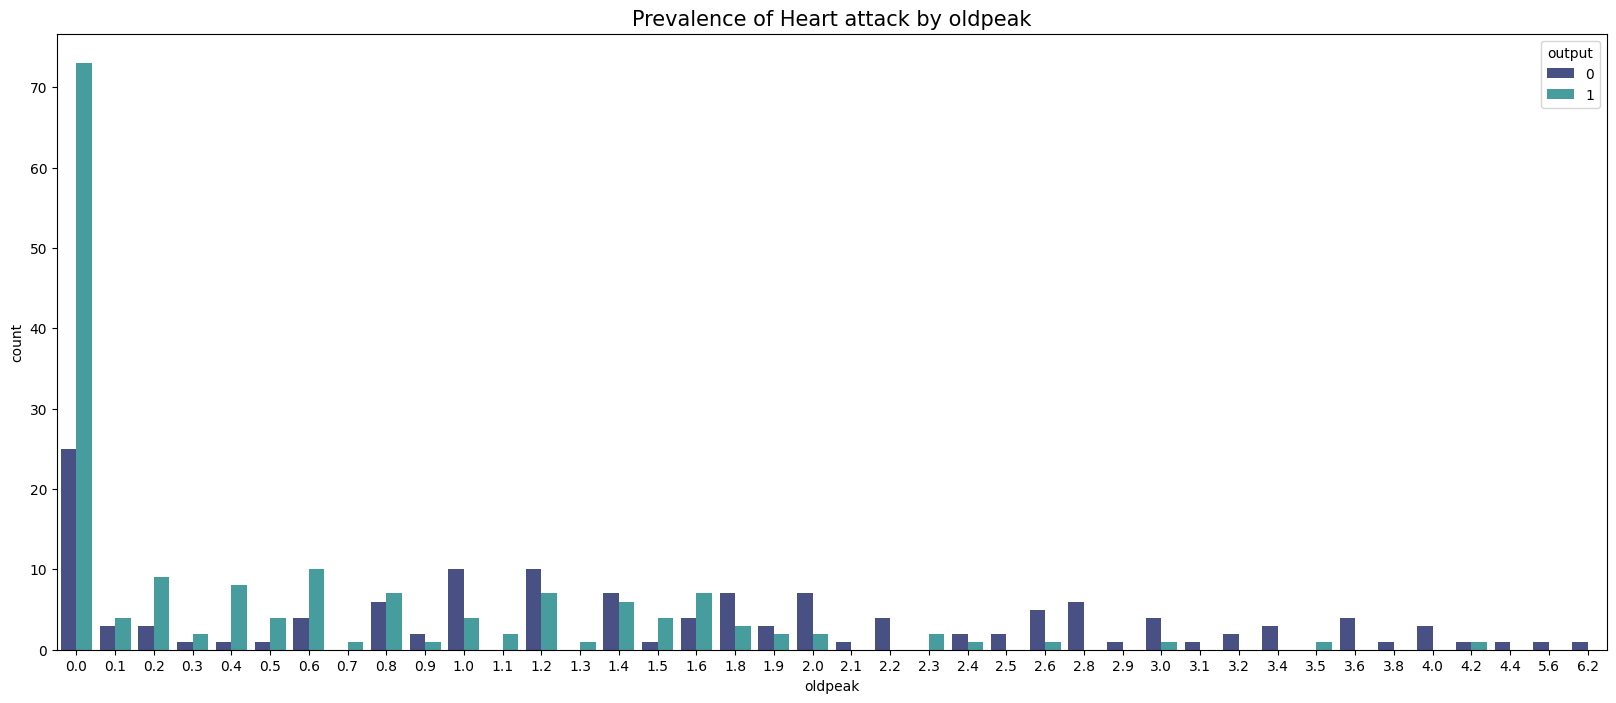

In [80]:
# Plot prevalence of heart attack by oldpeak
plt.figure(figsize = (20, 8))
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['oldpeak'], palette="mako")
plt.title('Prevalence of Heart attack by oldpeak',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by slp')

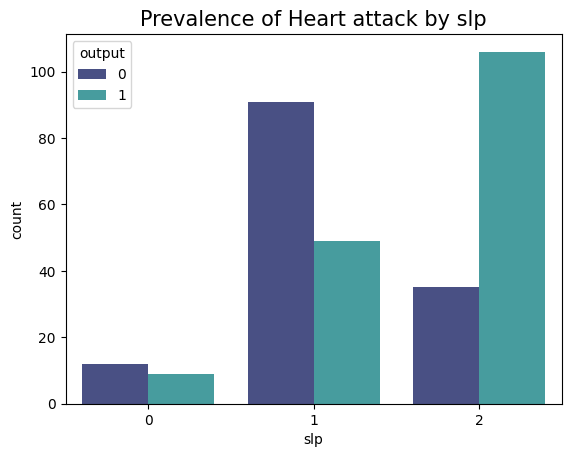

In [81]:
# Plot prevalence of heart attack by slp
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['slp'], palette="mako")
plt.title('Prevalence of Heart attack by slp',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by number of major vessels')

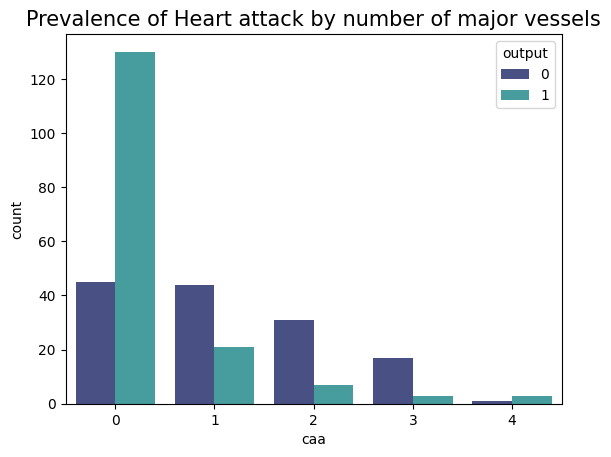

In [82]:
# Plot prevalence of heart attack by number of major vessels
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['caa'], palette="mako")
plt.title('Prevalence of Heart attack by number of major vessels',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by thall')

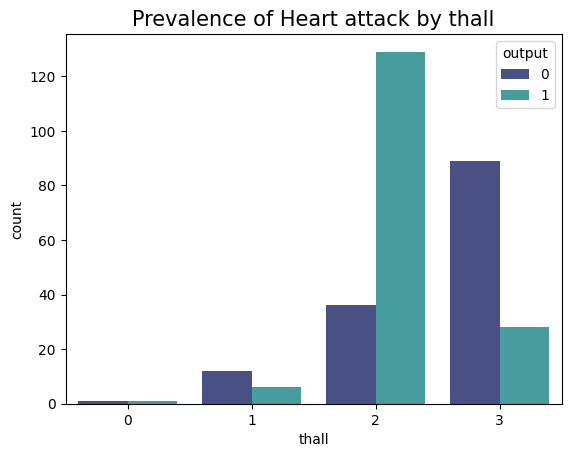

In [83]:
# Plot prevalence of heart attack by thall
sb.countplot(data=heart_dataset,hue=heart_dataset['output'],x=heart_dataset['thall'], palette="mako")
plt.title('Prevalence of Heart attack by thall',fontsize=15)

<Axes: xlabel='thalachh', ylabel='chol'>

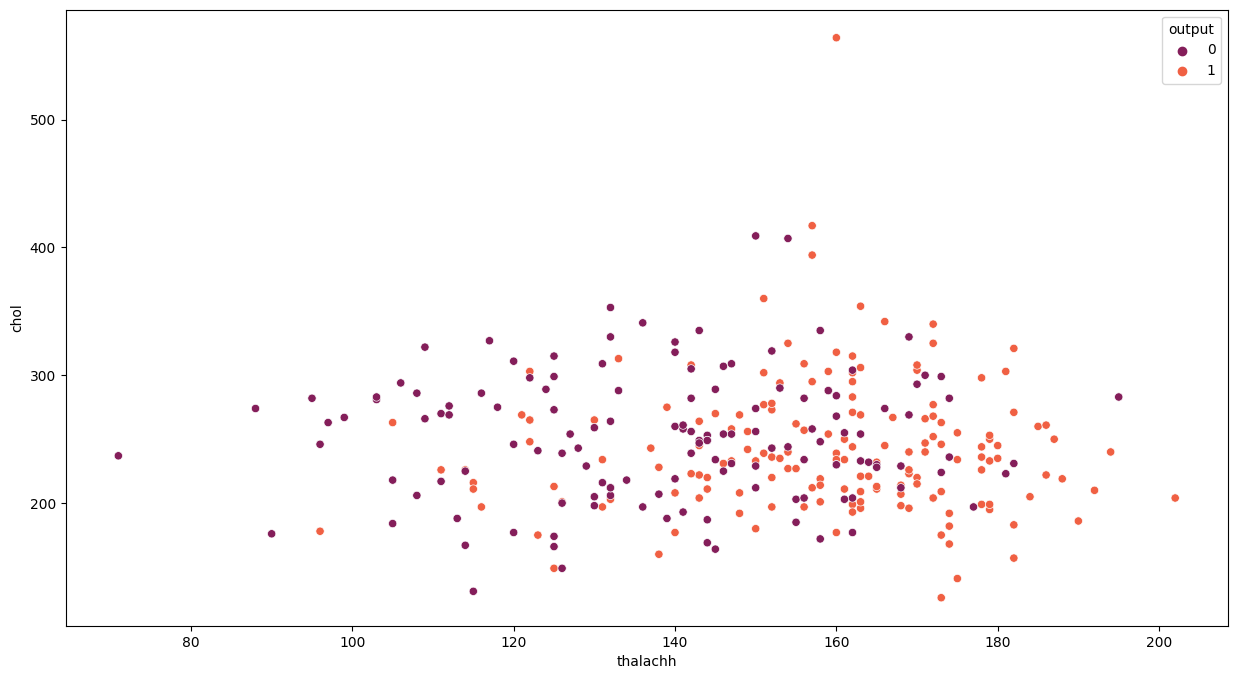

In [84]:
# Plot distribution of chol and thalachh
plt.figure(figsize = (15, 8))
sb.scatterplot(data=heart_dataset,x='thalachh',y='chol' ,hue='output', palette="rocket")

<Axes: xlabel='age', ylabel='chol'>

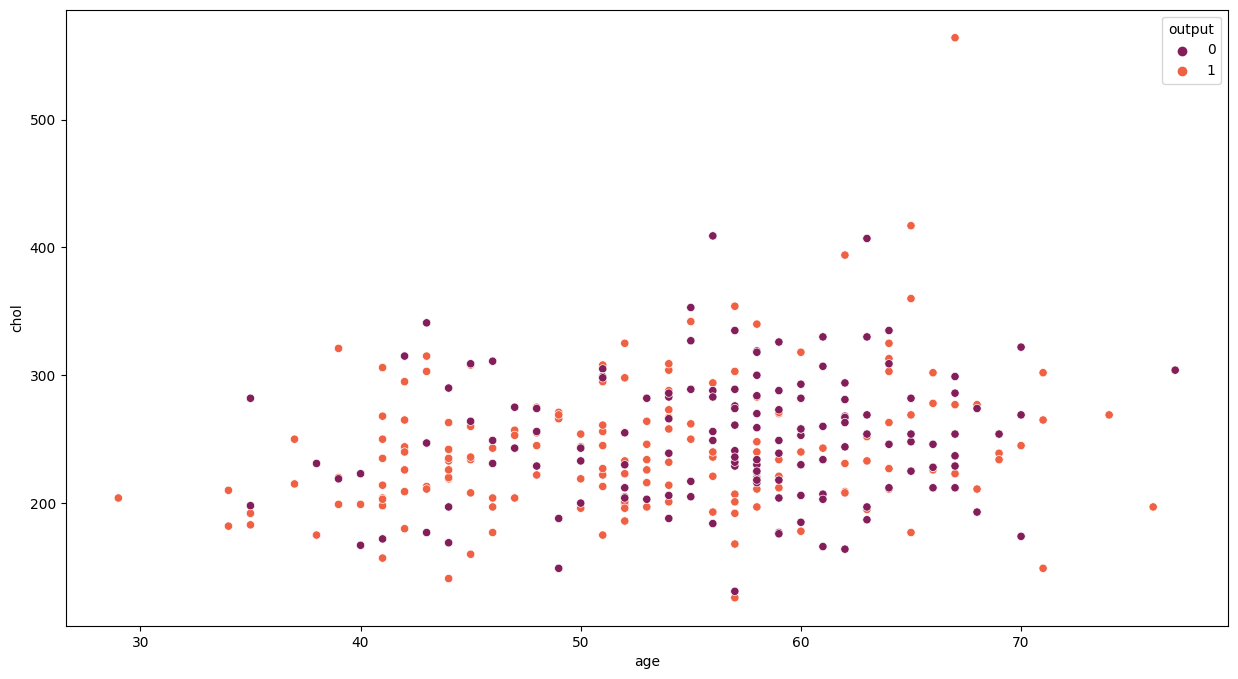

In [85]:
# Plot distribution of chol and age
plt.figure(figsize = (15, 8))
sb.scatterplot(data=heart_dataset,x='age',y='chol' ,hue='output', palette="rocket")

In [86]:
# Encode target labels with value between 0 and n_classes-1
labelencoder = LabelEncoder()
dataTransform = heart_dataset.copy()
for data in heart_dataset.columns:
    dataTransform[data] = labelencoder.fit_transform(heart_dataset[data])

In [87]:
# Display dataTransform
dataTransform

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,29,1,3,31,64,1,0,49,0,22,0,0,1,1
1,3,1,2,22,80,0,1,84,0,32,0,0,2,1
2,7,0,1,22,35,0,0,71,0,14,2,0,2,1
3,22,1,1,14,67,0,1,76,0,8,2,0,2,1
4,23,0,0,14,145,0,1,62,1,6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,23,0,0,28,71,0,1,23,1,2,1,0,3,0
299,11,1,3,8,93,0,1,32,0,12,1,0,3,0
300,34,1,0,30,26,1,1,40,0,31,1,2,3,0
301,23,1,0,22,1,0,1,16,1,12,1,1,3,0


In [88]:
#Remove the labels from the features
X=dataTransform.drop(['output'],axis=1)

In [89]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,29,1,3,31,64,1,0,49,0,22,0,0,1
1,3,1,2,22,80,0,1,84,0,32,0,0,2
2,7,0,1,22,35,0,0,71,0,14,2,0,2
3,22,1,1,14,67,0,1,76,0,8,2,0,2
4,23,0,0,14,145,0,1,62,1,6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,23,0,0,28,71,0,1,23,1,2,1,0,3
299,11,1,3,8,93,0,1,32,0,12,1,0,3
300,34,1,0,30,26,1,1,40,0,31,1,2,3
301,23,1,0,22,1,0,1,16,1,12,1,1,3


In [90]:
#Labels are the values which we want to predict
Y=dataTransform['output']

In [91]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 302, dtype: int64

In [92]:
#saving feature name for later use
heart_feature_list=list(X.columns)

In [93]:
#display features name
heart_feature_list

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall']

In [94]:
#Spiliting and training the dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=80)

In [95]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
92,18,1,2,27,54,0,1,68,0,0,2,4,2
234,36,1,0,22,135,0,0,11,0,23,1,3,2
24,6,1,3,28,31,0,1,76,1,14,2,0,3
178,9,1,0,14,15,0,0,20,1,24,1,0,3
188,16,1,2,28,64,0,1,62,0,6,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,22,1,1,14,67,0,1,76,0,8,2,0,2
10,20,1,0,28,69,0,1,59,0,12,2,0,2
212,5,1,0,13,50,0,1,39,0,12,1,0,3
189,7,1,0,8,11,0,0,57,0,0,2,0,3


In [96]:
X_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
23,27,1,2,34,73,1,1,36,1,10,1,0,2
261,18,1,0,9,61,0,1,59,0,0,2,1,2
184,16,1,0,34,73,0,0,28,0,25,1,0,3
229,30,1,2,18,128,0,1,31,1,17,1,0,3
103,8,1,2,14,70,1,1,88,0,8,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,5,0,2,0,31,0,1,77,0,0,2,0,2
117,22,1,3,14,26,0,0,61,0,18,1,0,3
160,22,1,1,14,70,0,1,68,0,0,0,0,2
130,20,0,2,39,33,0,1,62,0,0,2,1,2


In [97]:
#Display train labels
Y_train

92     1
234    0
24     1
178    0
188    0
      ..
3      1
10     1
212    0
189    0
176    0
Name: output, Length: 241, dtype: int64

In [98]:
#Display test Labels
Y_test

23     1
261    0
184    0
229    0
103    1
      ..
124    1
117    1
160    1
130    1
277    0
Name: output, Length: 61, dtype: int64

In [99]:
#Display the shape of train and test features and labels
print('The shape of train features: ',X_train.shape)
print('The shape of train of labels: ',Y_train.shape)
print('The shape of test features: ',X_test.shape)
print('The shape of test labels: ',Y_test.shape)

The shape of train features:  (241, 13)
The shape of train of labels:  (241,)
The shape of test features:  (61, 13)
The shape of test labels:  (61,)


Prediction Model

In [100]:
# Instantiate model with 1200 decision trees
model = RandomForestClassifier(n_estimators=1200)
# Train the model on training data
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1200)

In [102]:
#Use the forest prediction on test data
prediction_y=model.predict(X_test)

In [103]:
prediction_y

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [105]:
#Display accuracy score
experiment_accuracy=sm.accuracy_score(Y_test,prediction_y)
print('Accuracy Score :',str(experiment_accuracy))


Accuracy Score : 0.8360655737704918


In [106]:
# Display classification report
print("Classification Report : ")
print(sm.classification_report(prediction_y,Y_test,target_names=["Heart Attack Risk","No Heart Attack Risk"]))

Classification Report : 
                      precision    recall  f1-score   support

   Heart Attack Risk       0.74      0.74      0.74        19
No Heart Attack Risk       0.88      0.88      0.88        42

            accuracy                           0.84        61
           macro avg       0.81      0.81      0.81        61
        weighted avg       0.84      0.84      0.84        61



Text(109.44999999999997, 0.5, 'predicted class axis')

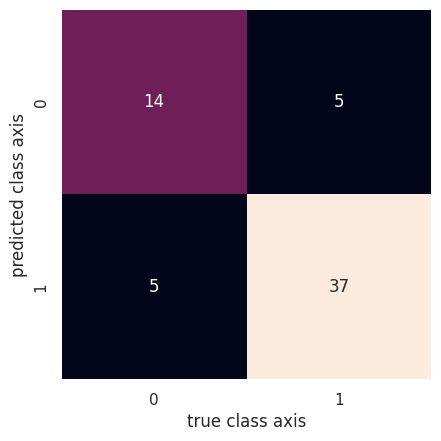

In [107]:
# Display confusion matrix
sb.set()
get_ipython().run_line_magic('matplotlib','inline')
confusionmt = sm.confusion_matrix(Y_test,prediction_y)
sb.heatmap(confusionmt.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true class axis')
plt.ylabel('predicted class axis')

Prediction for Input Values

In [108]:
# Input values for prediction
age = 50
sex = 0
cp = 3
trtbps = 110
chol = 264
fbs = 1
restecg = 1
thalachh = 300
exng = 0
oldpeak = 1.2
slp = 1
caa = 0
thall = 3

In [109]:
# Predict heart attack risk using trained model
predict_value = model.predict([[age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall]])
print('Predict Output : ', predict_value)

Predict Output :  [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
